<a href="https://colab.research.google.com/github/asadbek11211/Pandas_exercises/blob/main/math_magistr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-29ea6c6f7c83>:38: RuntimeWarning: overflow encountered in exp
  A_half_step = A * np.exp(-1j * β_2 * dz / 2 * np.gradient(A, dt) ** 2)
<ipython-input-5-29ea6c6f7c83>:38: RuntimeWarning: overflow encountered in multiply
  A_half_step = A * np.exp(-1j * β_2 * dz / 2 * np.gradient(A, dt) ** 2)
<ipython-input-5-29ea6c6f7c83>:38: RuntimeWarning: invalid value encountered in multiply
  A_half_step = A * np.exp(-1j * β_2 * dz / 2 * np.gradient(A, dt) ** 2)
<ipython-input-5-29ea6c6f7c83>:41: RuntimeWarning: overflow encountered in square
  A_full_step = A_half_step * np.exp(1j * γ * np.abs(A_half_step) ** 2 * dz)
<ipython-input-5-29ea6c6f7c83>:41: RuntimeWarning: invalid value encountered in multiply
  A_full_step = A_half_step * np.exp(1j * γ * np.abs(A_half_step) ** 2 * dz)
<ipython-input-5-29ea6c6f7c83>:44: RuntimeWarning: overflow encountered in square
  A = A_full_step * np.exp(-1j * β_2 * dz / 2 * np.gradient(A_full_step, dt) ** 2)
<ipython-input-5-29ea6c6f7c83>:44: Runt

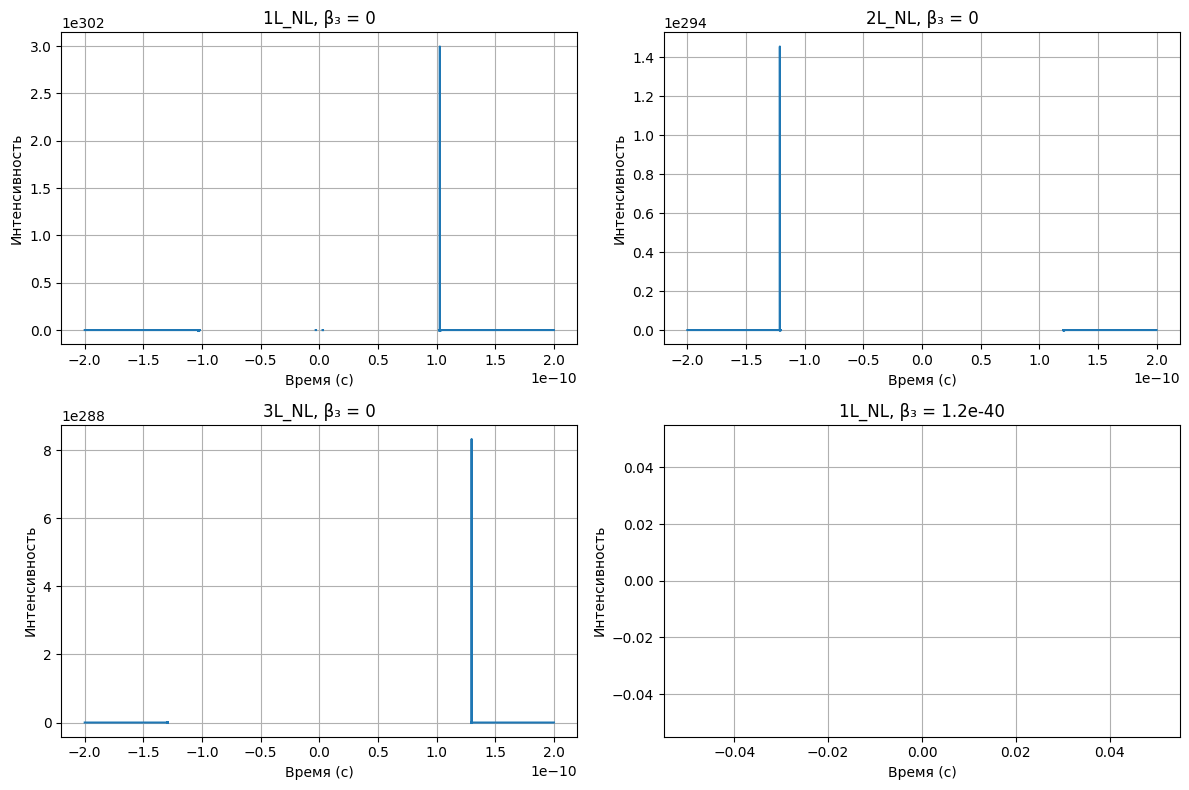

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные параметры
P = 10  # мощность
t_0 = 0  # позиция
τ_white = 100e-12  # длительность белого импульса
τ_dark = 1e-12  # длительность темного импульса
γ = 0.003  # 1/(Вт*м)
β_2 = -1.8e-27  # с^2/м^2
β_3_1 = 0  # случай 1: β₃ = 0
β_3_2 = 1.2e-40  # случай 2: β₃ = 1.2 * 10^(-40)
h_z = 1e-3  # потери на 1 м (0.2 dB)

# Нелинейная длина
L_NL = 1 / (γ * P)

# Границы по времени
t_min = -200e-12
t_max = 200e-12
dt = 1e-15

# Создаем массив времени
t = np.arange(t_min, t_max, dt)

# Определение функции начального импульса A(t)
def initial_pulse(t):
    return P * np.exp(-((t - t_0) ** 2) / (τ_white ** 2)) * (1 - 0.5 * np.exp(-((t - t_0) ** 2) / τ_dark ** 2))

# Метод расщепления оператора для уравнения Шредингера
def split_step_method(A0, β3, L):
    A = np.copy(A0)
    dz = L / 100  # шаг по пространству
    dz_steps = int(L / dz)

    for i in range(dz_steps):
        # Применяем дифракционный оператор (полушаг)
        A_half_step = A * np.exp(-1j * β_2 * dz / 2 * np.gradient(A, dt) ** 2)

        # Применяем нелинейный оператор (полный шаг)
        A_full_step = A_half_step * np.exp(1j * γ * np.abs(A_half_step) ** 2 * dz)

        # Применяем дифракционный оператор (полушаг)
        A = A_full_step * np.exp(-1j * β_2 * dz / 2 * np.gradient(A_full_step, dt) ** 2)

        # Добавляем третий порядок дисперсии
        if β3 != 0:
            A -= 1j * β_3 * dz * np.gradient(np.gradient(np.gradient(A, dt), dt), dt)

    return A

# Рассчитываем распространение импульса для двух случаев

# Случай 1: β₃ = 0
A_1 = initial_pulse(t)
A_1_LNL = split_step_method(A_1, β_3_1, L_NL)
A_1_2LNL = split_step_method(A_1_LNL, β_3_1, L_NL)
A_1_3LNL = split_step_method(A_1_2LNL, β_3_1, L_NL)

# Случай 2: β₃ = 1.2 * 10^(-40)
A_2 = initial_pulse(t)
A_2_LNL = split_step_method(A_2, β_3_2, L_NL)
A_2_2LNL = split_step_method(A_2_LNL, β_3_2, L_NL)
A_2_3LNL = split_step_method(A_2_2LNL, β_3_2, L_NL)

# Выводим результаты на график

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t, np.abs(A_1_LNL) ** 2)
plt.title("1L_NL, β₃ = 0")
plt.xlabel("Время (с)")
plt.ylabel("Интенсивность")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t, np.abs(A_1_2LNL) ** 2)
plt.title("2L_NL, β₃ = 0")
plt.xlabel("Время (с)")
plt.ylabel("Интенсивность")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(t, np.abs(A_1_3LNL) ** 2)
plt.title("3L_NL, β₃ = 0")
plt.xlabel("Время (с)")
plt.ylabel("Интенсивность")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(t, np.abs(A_2_LNL) ** 2)
plt.title("1L_NL, β₃ = 1.2e-40")
plt.xlabel("Время (с)")
plt.ylabel("Интенсивность")
plt.grid()

plt.tight_layout()
plt.show()


<ipython-input-6-c9cc119c417f>:40: RuntimeWarning: overflow encountered in exp
  A = A_full_step * np.exp(-1j * β_2 * dz / 2 * np.gradient(A_full_step, dt) ** 2)
<ipython-input-6-c9cc119c417f>:40: RuntimeWarning: invalid value encountered in multiply
  A = A_full_step * np.exp(-1j * β_2 * dz / 2 * np.gradient(A_full_step, dt) ** 2)
<ipython-input-6-c9cc119c417f>:34: RuntimeWarning: overflow encountered in square
  A_half_step = A * np.exp(-1j * β_2 * dz / 2 * np.gradient(A, dt) ** 2)
<ipython-input-6-c9cc119c417f>:34: RuntimeWarning: invalid value encountered in square
  A_half_step = A * np.exp(-1j * β_2 * dz / 2 * np.gradient(A, dt) ** 2)
<ipython-input-6-c9cc119c417f>:34: RuntimeWarning: invalid value encountered in multiply
  A_half_step = A * np.exp(-1j * β_2 * dz / 2 * np.gradient(A, dt) ** 2)
<ipython-input-6-c9cc119c417f>:34: RuntimeWarning: overflow encountered in exp
  A_half_step = A * np.exp(-1j * β_2 * dz / 2 * np.gradient(A, dt) ** 2)
<ipython-input-6-c9cc119c417f>:34: Ru

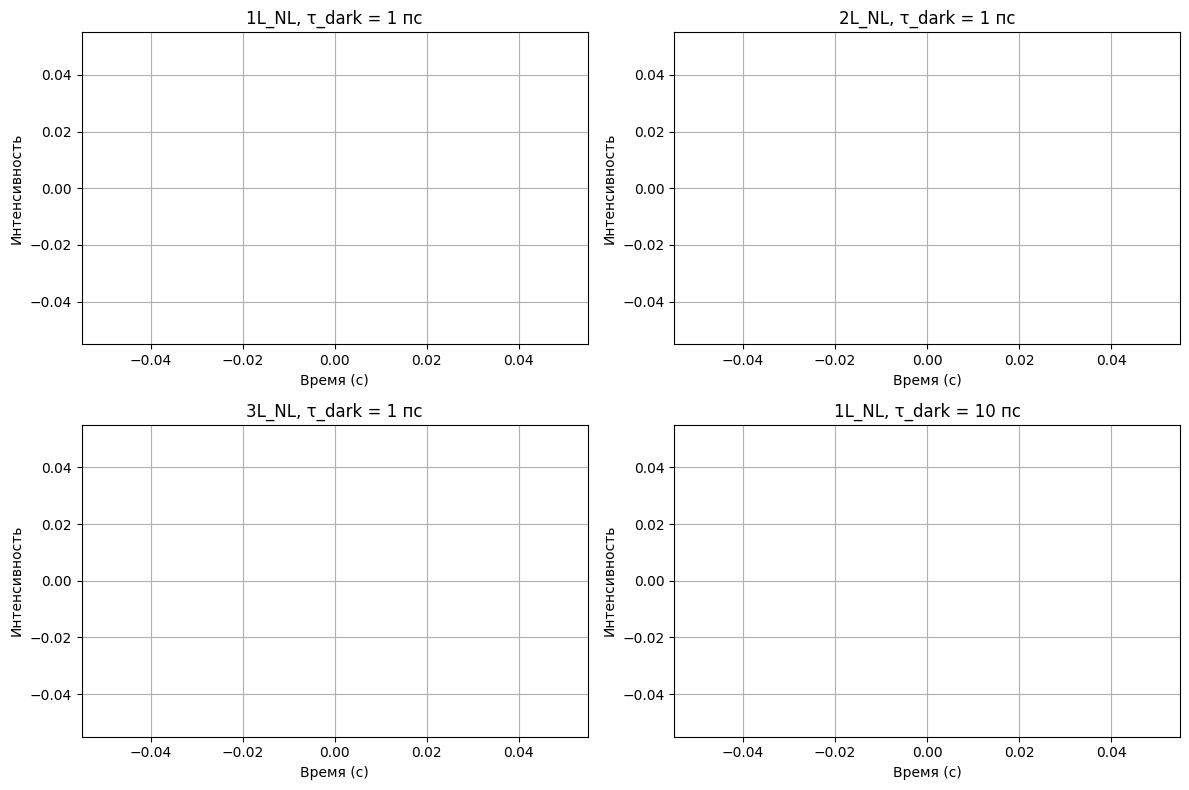

In [6]:


# Заданные параметры
P = 10  # мощность
t_0 = 0  # позиция
τ_white = 100e-12  # длительность белого импульса
τ_dark_1 = 1e-12  # τ_dark = 1 пс
τ_dark_2 = 10e-12  # τ_dark = 10 пс
γ = 0.003  # 1/(Вт*м)
β_2 = -1.8e-27  # с^2/м^2
β_3 = 1.2e-40  # случай с β₃

# Нелинейная длина
L_NL = 1 / (γ * P)

# Границы по времени
t_min = -200e-12
t_max = 200e-12
dt = 1e-15

# Создаем массив времени
t = np.arange(t_min, t_max, dt)

# Определение функции начального импульса A(t)
def initial_pulse(t, τ_dark):
    return P * np.exp(-((t - t_0) ** 2) / (τ_white ** 2)) * (1 - 0.5 * np.exp(-((t - t_0) ** 2) / τ_dark ** 2))

# Метод расщепления оператора для уравнения Шредингера
def split_step_method(A0, L):
    A = np.copy(A0)
    dz = L / 100  # шаг по пространству
    dz_steps = int(L / dz)

    for i in range(dz_steps):
        # Применяем дифракционный оператор (полушаг)
        A_half_step = A * np.exp(-1j * β_2 * dz / 2 * np.gradient(A, dt) ** 2)

        # Применяем нелинейный оператор (полный шаг)
        A_full_step = A_half_step * np.exp(1j * γ * np.abs(A_half_step) ** 2 * dz)

        # Применяем дифракционный оператор (полушаг)
        A = A_full_step * np.exp(-1j * β_2 * dz / 2 * np.gradient(A_full_step, dt) ** 2)

        # Добавляем третий порядок дисперсии
        A -= 1j * β_3 * dz * np.gradient(np.gradient(np.gradient(A, dt), dt), dt)

    return A

# Рассчитываем распространение импульса для двух случаев

# Случай 1: τ_dark = 1 пс
A_1 = initial_pulse(t, τ_dark_1)
A_1_LNL = split_step_method(A_1, L_NL)
A_1_2LNL = split_step_method(A_1_LNL, L_NL)
A_1_3LNL = split_step_method(A_1_2LNL, L_NL)

# Случай 2: τ_dark = 10 пс
A_2 = initial_pulse(t, τ_dark_2)
A_2_LNL = split_step_method(A_2, L_NL)
A_2_2LNL = split_step_method(A_2_LNL, L_NL)
A_2_3LNL = split_step_method(A_2_2LNL, L_NL)

# Выводим результаты на график

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t, np.abs(A_1_LNL) ** 2)
plt.title("1L_NL, τ_dark = 1 пс")
plt.xlabel("Время (с)")
plt.ylabel("Интенсивность")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t, np.abs(A_1_2LNL) ** 2)
plt.title("2L_NL, τ_dark = 1 пс")
plt.xlabel("Время (с)")
plt.ylabel("Интенсивность")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(t, np.abs(A_1_3LNL) ** 2)
plt.title("3L_NL, τ_dark = 1 пс")
plt.xlabel("Время (с)")
plt.ylabel("Интенсивность")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(t, np.abs(A_2_LNL) ** 2)
plt.title("1L_NL, τ_dark = 10 пс")
plt.xlabel("Время (с)")
plt.ylabel("Интенсивность")
plt.grid()

plt.tight_layout()
plt.show()


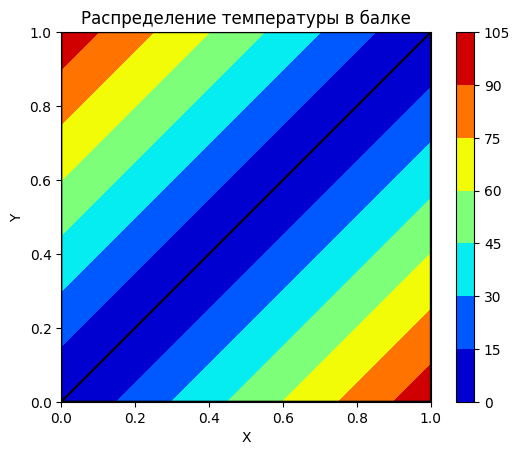

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# Задаем геометрию балки (координаты узлов)
nodes = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Задаем триангуляцию (треугольники)
triangles = np.array([[0, 1, 2], [0, 2, 3]])

# Задаем граничные условия
boundary_nodes = [0, 1, 2, 3]  # Все узлы являются граничными
boundary_temperatures = [0, 100, 0, 100]  # Градиент температуры на противоположных сторонах

# Функция для вычисления матрицы жесткости элемента
def element_stiffness_matrix(node_coords):
    # В данном примере предполагаем однородный материал и тонкие элементы
    # Можно использовать аналитический расчет или численное интегрирование
    # В данном случае просто возвращаем единичную матрицу
    return np.eye(3)

# Создаем глобальную матрицу жесткости и вектор нагрузки
num_nodes = len(nodes)
global_stiffness_matrix = np.zeros((num_nodes, num_nodes))
global_load_vector = np.zeros(num_nodes)

# Сборка глобальной матрицы жесткости и вектора нагрузки
for element in triangles:
    node_coords = nodes[element]
    element_stiffness = element_stiffness_matrix(node_coords)
    for i in range(3):
        global_load_vector[element[i]] += 0  # Здесь можно добавить расчет нагрузки, если необходимо
        for j in range(3):
            global_stiffness_matrix[element[i], element[j]] += element_stiffness[i, j]

# Применяем граничные условия
for i, node in enumerate(boundary_nodes):
    global_stiffness_matrix[node, :] = 0
    global_stiffness_matrix[node, node] = 1
    global_load_vector[node] = boundary_temperatures[i]

# Решаем систему уравнений
temperatures = np.linalg.solve(global_stiffness_matrix, global_load_vector)

# Визуализация результатов
plt.figure()
plt.gca().set_aspect('equal')
t = tri.Triangulation(nodes[:, 0], nodes[:, 1], triangles)
plt.tricontourf(t, temperatures, cmap='jet')
plt.colorbar()
plt.triplot(t, 'k-')
plt.title('Распределение температуры в балке')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


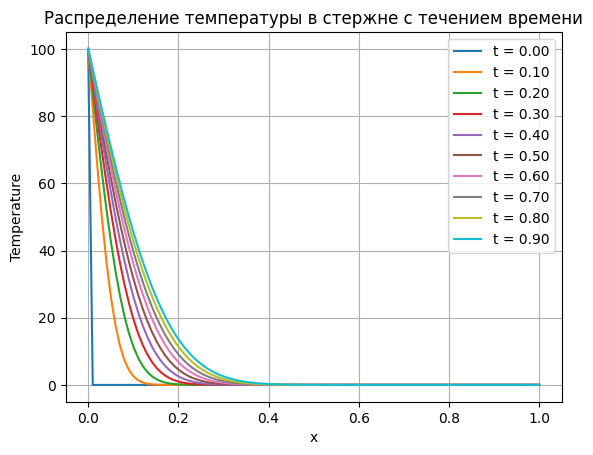

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры задачи
alpha = 0.01  # Коэффициент теплопроводности
length = 1.0  # Длина стержня
time_total = 1.0  # Общее время
num_points = 100  # Количество узлов в пространстве
num_steps = 1000  # Количество временных шагов

# Шаг по пространству
dx = length / (num_points - 1)

# Шаг по времени
dt = time_total / num_steps

# Инициализируем массив для хранения температурных значений
temperatures = np.zeros((num_steps, num_points))

# Задаем начальные условия (температура в начальный момент времени)
temperatures[0, :] = 0.0

# Задаем граничные условия (температура на концах стержня)
temperatures[:, 0] = 100.0
temperatures[:, -1] = 0.0

# Численное решение уравнения методом явной схемы
for t in range(1, num_steps):
    for x in range(1, num_points - 1):
        temperatures[t, x] = temperatures[t - 1, x] + alpha * dt / dx**2 * (
            temperatures[t - 1, x + 1] - 2 * temperatures[t - 1, x] + temperatures[t - 1, x - 1]
        )

# Визуализация результатов
plt.figure()
x_values = np.linspace(0, length, num_points)
for t in range(0, num_steps, int(num_steps / 10)):  # Выводим 10 временных шагов
    plt.plot(x_values, temperatures[t, :], label=f"t = {t * dt:.2f}")
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Распределение температуры в стержне с течением времени')
plt.legend()
plt.grid(True)
plt.show()
